In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')


In [64]:
# feat_df = pd.read_csv('exp\gen_data\Conclusion.csv')
# conclusion_df = pd.read_csv('exp\gen_data\Conclusion.csv')

feat_df_swat = pd.read_csv('exp\SWat2019\Feature__Maxerror.csv')
conclusion_df_swat = pd.read_csv('exp\SWat2019\Conclusion.csv')

# Algorithms

## Preprocess

## Swat

In [86]:
Id = ['LIT 301','MV 501','MV201','P101 Status','P301 Status','P601 Status']
cyclic = ['Yes','No','Yes','Yes','No','Yes']

In [87]:
cyclic_df = pd.DataFrame({'Id': Id, 'cyclic': cyclic}).set_index('Id')

In [67]:
conclusion_df_swat['min(max_error)'] = conclusion_df_swat['min(max_error)'].fillna(conclusion_df_swat['min'])
conclusion_df_swat['max(max_error)'] = conclusion_df_swat['max(max_error)'].fillna(conclusion_df_swat['max'])
conclusion_df_swat['Time Average(in range)'] = conclusion_df_swat['Time Average(in range)'].fillna(conclusion_df_swat['Time Average(s)'])

In [68]:
conclusion_df_swat = conclusion_df_swat.drop(columns=['min','max','Time Average(s)'],axis=1)

 ## 10 data gen

In [90]:
cyclic = ['No','No','No','No','No','Yes','Yes','Yes','Yes','Yes']
cyclic_df = pd.DataFrame({'Id': range(1,11), 'cyclic': cyclic}).set_index('Id')

# nối  bảng conclusion_df_swat và conclusion_df rồi xử lí chung 

In [69]:
Topdown_df = conclusion_df_swat.loc[conclusion_df_swat['Algorithm']=='Top-down'].set_index('Id')
Bottomup_df = conclusion_df_swat.loc[conclusion_df_swat['Algorithm']=='Bottom-up'].set_index('Id')
Sldw_df = conclusion_df_swat.loc[conclusion_df_swat['Algorithm']=='Sliding-window'].set_index('Id')
Swab_df = conclusion_df_swat.loc[conclusion_df_swat['Algorithm']=='SWAB'].set_index('Id')

Can detect if F1-score > 0.7

In [71]:
Topdown_df['Detect'] = Topdown_df.apply(lambda x:'✔' if x['F1-score'] > 0.7 else '❌',axis=1 )
Bottomup_df['Detect'] = Bottomup_df.apply(lambda x:'✔' if x['F1-score'] > 0.7 else '❌',axis=1 )
Sldw_df['Detect'] = Sldw_df.apply(lambda x:'✔' if x['F1-score'] > 0.7 else '❌',axis=1 )
Swab_df['Detect'] = Swab_df.apply(lambda x:'✔' if x['F1-score'] > 0.7 else '❌',axis=1 )

In [89]:
detect_df = pd.DataFrame({'id': Id}).set_index('id')
detect_df['Topdown'] = Topdown_df.Detect
detect_df['Bottomup'] = Bottomup_df.Detect
detect_df['SlidingWindow'] = Sldw_df.Detect
detect_df['SWAB'] = Swab_df.Detect
detect_df['Cyclic'] = cyclic_df



sum_topdown = num_detect['Topdown'].sum()
sum_bottomup = num_detect['Bottomup'].sum()
sum_slidingwindow = num_detect['SlidingWindow'].sum()
sum_swab = num_detect['SWAB'].sum()

detect_df.loc['Total'] = [sum_topdown, sum_bottomup, sum_slidingwindow, sum_swab,None]

detect_df

,Topdown,Bottomup,SlidingWindow,SWAB,Cyclic
id,,,,,
LIT 301,✔,✔,✔,✔,Yes
MV 501,✔,✔,✔,✔,No
MV201,❌,✔,❌,✔,Yes
P101 Status,❌,❌,❌,✔,Yes
P301 Status,✔,❌,❌,❌,No
P601 Status,✔,❌,✔,❌,Yes
Total,4.0,3.0,3.0,4.0,NaN


# Max error

In [28]:
feat_df

,id,Num_points,mean,median,variance,standard_deviation,absolute_sum_of_changes,mean_abs_change,kurtosis,minimum,maximum,Min(max_error)_Top_down,Max(max_error)_Top_down,Min(max_error)_Bottom_up,Max(max_error)_Bottom_up,Min(max_error)_SLDW,Max(max_error)_SLDW,Min(max_error)_SWAB,Max(max_error)_SWAB,Best(max_error)_SWAB
0,2,8640,102.151881,100.286884,212.017664,14.560826,95822.993645,11.091908,4.776042,62.598994,181.709748,50000,350000,30000,90000,35000,150000,30000,90000,60000
1,1,8640,104.621483,100.014344,442.227086,21.029196,4986.149682,0.577167,16.640276,98.129950,201.585487,50,850000,50,10100,10000,550000,50,12500,4975
2,3,8640,105.479853,104.740898,27.596187,5.253207,4896.920656,0.566839,11.940497,98.632061,132.271730,4000,57500,100,625,2500,25000,100,600,350
3,4,8640,101.822061,101.317681,3.021211,1.738163,977.164373,0.113111,1.649976,99.734227,110.681462,1400,5000,0,100,400,1400,0,100,50
4,6,8640,104.766749,113.999449,5159.711223,71.831130,10003.014053,1.157890,-1.502673,-5.871039,202.953165,90000,5000000,25000,35000,40000,1000000,98,102,100
5,7,8640,102.895171,101.124826,13.689025,3.699868,975.726054,0.112944,-0.675163,94.723825,110.220648,30,450,2,25,30,140,2,25,10
6,8,8640,99.998457,99.999819,0.185628,0.430846,971.447477,0.112449,1.043627,98.715405,101.216021,5,30,1,4,1,10,1,4,2
7,9,8640,99.951207,99.996803,0.240128,0.490029,217.890120,0.025222,0.123460,98.939642,101.066830,500,1000,30,200,43,47,30,85,50
8,10,8640,100.005260,100.001092,0.207109,0.455093,221.400262,0.025628,0.444073,98.938823,101.061042,40,60,30,700,40,60,400,100000,50000
9,5,43200,103.250000,103.875000,inf,inf,3370.000000,0.112366,-0.695312,99.937500,110.812500,100,15000,50,100,100,300,20,100,75


In [34]:
corr_feat_df = feat_df.corr()
corr_feat_df = corr_feat_df.loc['Min(max_error)_Top_down':'Max(max_error)_SWAB',:'maximum']

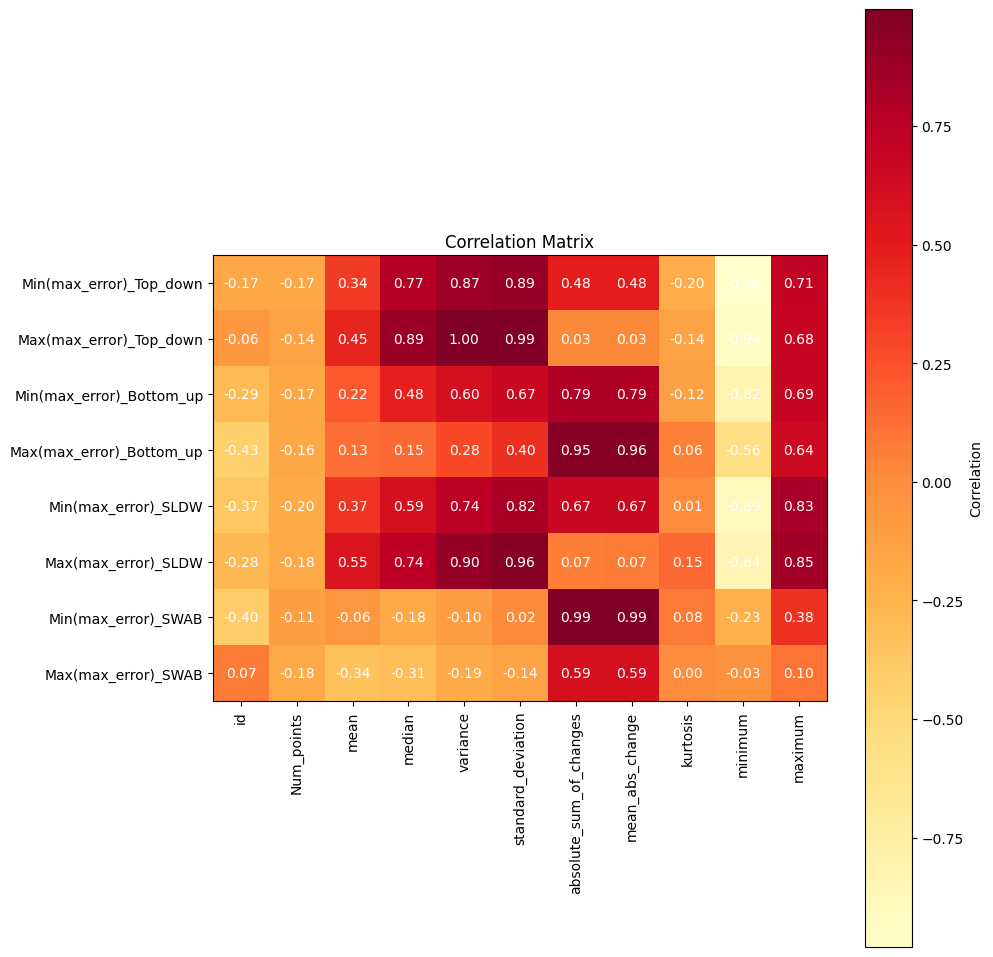

In [105]:
plt.figure(figsize=(10, 10))
plt.imshow(corr_feat_df, cmap='YlOrRd', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Correlation Matrix')

for i in range(len(corr_feat_df.index)):
    for j in range(len(corr_feat_df.columns)):
        plt.text(j, i, f'{corr_feat_df.iloc[i, j]:.2f}', ha='center', va='center', color='white')

plt.xticks(ticks=np.arange(len(corr_feat_df.columns)), labels=corr_feat_df.columns,rotation=90)
plt.yticks(ticks=np.arange(len(corr_feat_df.index)), labels=corr_feat_df.index)
plt.tight_layout()